### Import

In [1]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import random
import matplotlib.image as mpimg
from glob import glob
import cv2
import numpy as np
import hashlib
from collections import defaultdict
from tqdm import tqdm


### Load Dataset

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 기본 한글 폰트 경로 (환경에 따라 다를 수 있음)
font_path = "C:/Windows/Fonts/malgun.ttf"  
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [ ]:
# 데이터 경로
DATA_DIR = './data/train'

# 클래스 목록 가져오기
class_dirs = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print(f"클래스 목록: {class_dirs}")
print(len(class_dirs), "클래스")

# 클래스별 이미지 경로 수집
data = []
for cls in class_dirs:
    cls_dir = os.path.join(DATA_DIR, cls)
    for img_name in os.listdir(cls_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(cls_dir, img_name)
            img_path = os.path.normpath(img_path)  # 경로 정규화
            data.append({
                'class': cls,
                'img_path': img_path
            })

df = pd.DataFrame(data)

클래스 목록: ['1시리즈_F20_2013_2015', '1시리즈_F20_2016_2019', '1시리즈_F40_2020_2024', '2008_2015_2017', '2시리즈_그란쿠페_F44_2020_2024', '2시리즈_액티브_투어러_F45_2019_2021', '2시리즈_액티브_투어러_U06_2022_2024', '3008_2세대_2018_2023', '3시리즈_E90_2005_2012', '3시리즈_F30_2013_2018', '3시리즈_G20_2019_2022', '3시리즈_G20_2023_2025', '3시리즈_GT_F34_2014_2021', '4시리즈_F32_2014_2020', '4시리즈_G22_2021_2023', '4시리즈_G22_2024_2025', '5008_2세대_2018_2019', '5008_2세대_2021_2024', '5시리즈_F10_2010_2016', '5시리즈_G30_2017_2023', '5시리즈_G60_2024_2025', '5시리즈_GT_F07_2010_2017', '6시리즈_F12_2011_2018', '6시리즈_GT_G32_2018_2020', '6시리즈_GT_G32_2021_2024', '718_박스터_2017_2024', '718_카이맨_2017_2024', '7시리즈_F01_2009_2015', '7시리즈_G11_2016_2018', '7시리즈_G11_2019_2022', '7시리즈_G70_2023_2025', '8시리즈_G15_2020_2024', '911_2003_2019', '911_992_2020_2024', 'A4_B9_2016_2019', 'A4_B9_2020_2024', 'A5_F5_2019_2024', 'A6_C8_2019_2025', 'A7_2012_2016', 'A7_4K_2020_2024', 'A8_D5_2018_2023', 'All_New_XJ_2016_2019', 'AMG_GT_2016_2024', 'A_클래스_W176_2015_2018', 'A_클래스_W177_2020_2025', 

### 클래스별 이미지 수 시각화

C:\Users\danyo\AppData\Local\Temp\ipykernel_24732\1690146883.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\danyo\miniconda3\envs\hecto\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


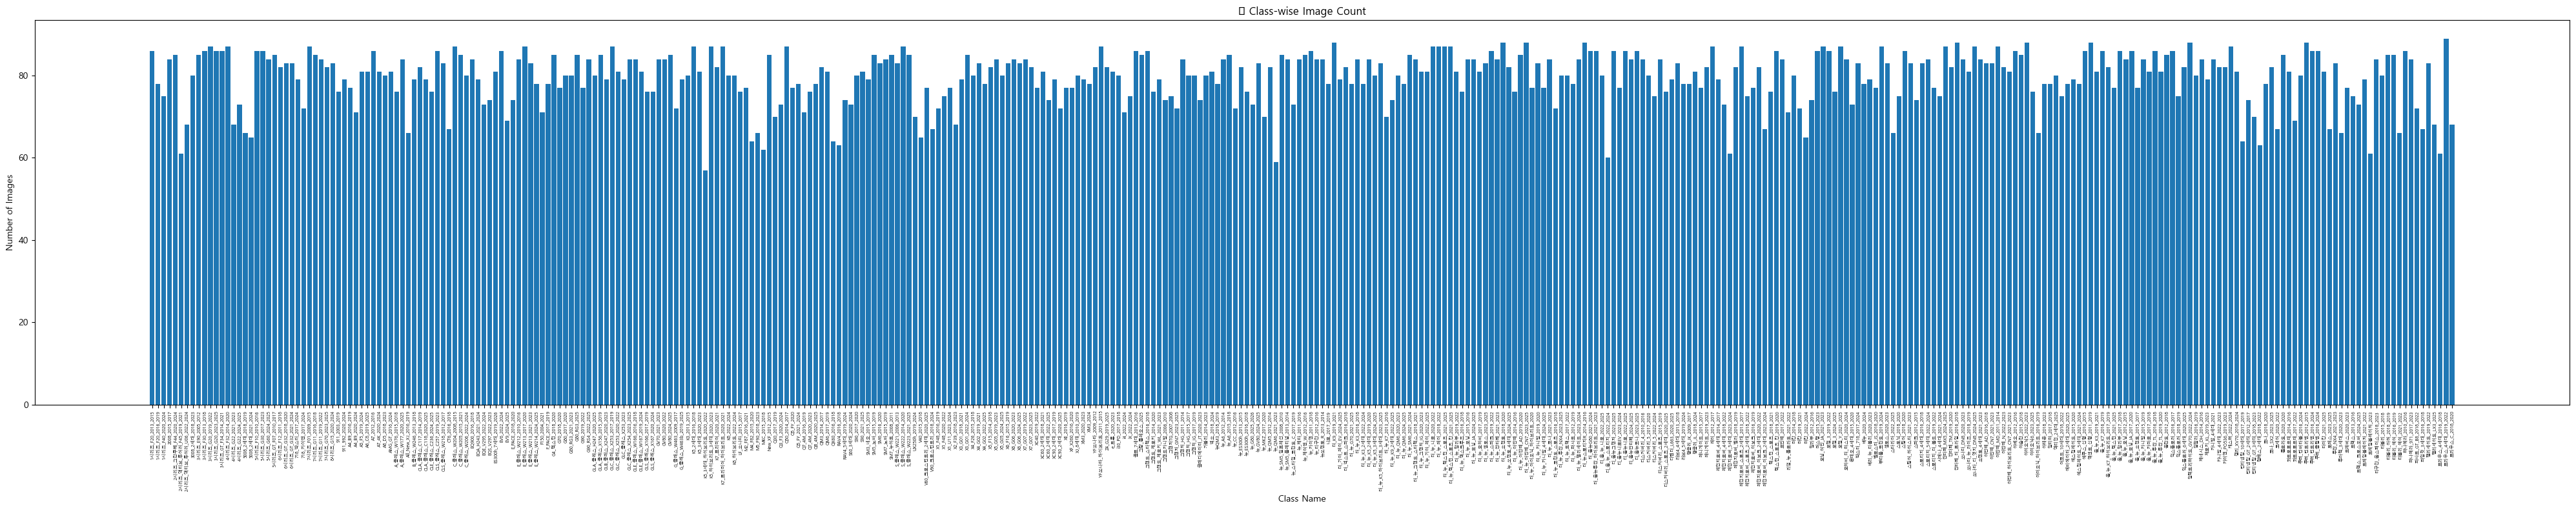

In [4]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts().sort_index()
class_names = class_counts.index.tolist()
image_counts = class_counts.values

plt.figure(figsize=(40, 8))
plt.bar(class_names, image_counts)
plt.title("📊 Class-wise Image Count")
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.show()

### 품질, 사이즈, 밝기 분포 확인

100%|██████████| 33137/33137 [01:19<00:00, 418.52it/s]


열기 실패한 이미지 수: 0
              width        height    brightness
count  33137.000000  33137.000000  33137.000000
mean     690.290732    436.583819    108.586380
std      150.817513     74.954611     20.269282
min       91.000000     61.000000     54.512823
25%      560.000000    395.000000     93.649401
50%      688.000000    430.000000    106.635201
75%      830.000000    470.000000    121.886312
max     1881.000000   1310.000000    225.306517


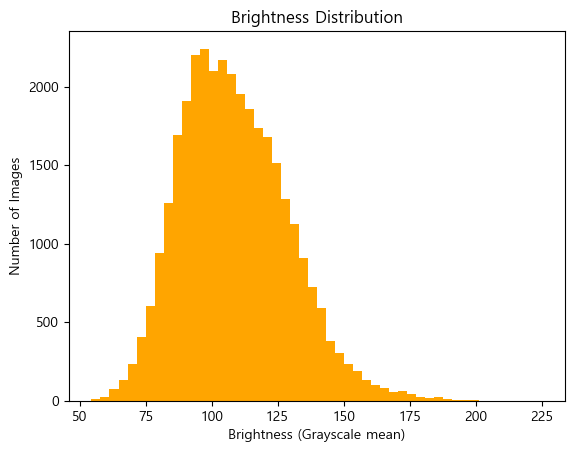

In [21]:
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def check_image_properties_pil(img_path):
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            
            # 그레이스케일 변환 후 밝기 계산 (픽셀 평균)
            gray = img.convert('L')  
            brightness = np.mean(np.array(gray))
            
            return width, height, brightness, True
    except Exception as e:
        # 열기 실패 시 None 반환
        return None, None, None, False

# tqdm으로 진행률 보면서 데이터프레임에 추가
widths, heights, brightnesses, valid_flags = [], [], [], []

for img_path in tqdm(df['img_path']):
    w, h, b, valid = check_image_properties_pil(img_path)
    widths.append(w)
    heights.append(h)
    brightnesses.append(b)
    valid_flags.append(valid)

df['width'] = widths
df['height'] = heights
df['brightness'] = brightnesses
df['is_valid'] = valid_flags

print(f"열기 실패한 이미지 수: {df['is_valid'].value_counts().get(False, 0)}")

print(df[['width', 'height', 'brightness']].describe())

plt.hist(df['brightness'].dropna(), bins=50, color='orange')
plt.title('Brightness Distribution')
plt.xlabel('Brightness (Grayscale mean)')
plt.ylabel('Number of Images')
plt.show()


### 중복 이미지 탐지 (MD5 해시 기반)

In [23]:
from collections import defaultdict
import hashlib

hash_to_paths = defaultdict(list)

for img_path in df['img_path']:
    with open(img_path, 'rb') as f:
        img_hash = hashlib.md5(f.read()).hexdigest()
    hash_to_paths[img_hash].append(img_path)

duplicates = {h: paths for h, paths in hash_to_paths.items() if len(paths) > 1}

print(f"🔁 총 중복 해시 개수: {len(duplicates)}")
for h, paths in duplicates.items():
    print(f"해시: {h}, 중복 개수: {len(paths)}")
    for p in paths:
        print(f" - {p}")
    print()

🔁 총 중복 해시 개수: 1637
해시: 0bfc3a7f62dc6ecc3e48a208fd0ee75f, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0006.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0068.jpg

해시: 6fb3733c2ad3e6327b0644f7090a9755, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0014.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0035.jpg

해시: eb412e4a61533f3cbfca39d4b45efa20, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0017.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0060.jpg

해시: 5ad14ad28281bb95cb9579801063f9c3, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0040.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0075.jpg

해시: fb65f4b1ec92397bd8a41b0cd316ebe3, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0041.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0076.jpg

해시: 4730b8104c24c4810cd20229ec149aaf, 중복 개수: 2
 - data\train\1시리즈_F40_2020_2024\1시리즈_F40_2020_2024_0035.jpg
 - data\train\1시리즈_F40_

### 클래스별 이미지 시각화

C:\Users\danyo\AppData\Local\Temp\ipykernel_10808\252617866.py:35: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_10808\252617866.py:35: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Malgun Gothic.
  plt.tight_layout()


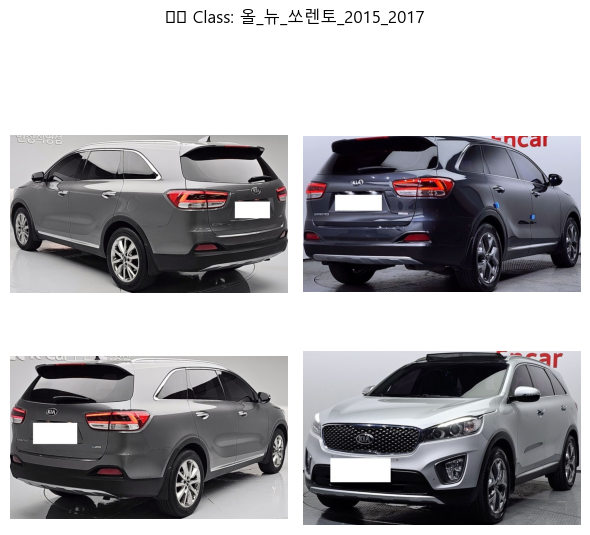

In [ ]:
# 설정값
NUM_CLASSES_TO_DISPLAY = 1
NUM_IMAGES_PER_CLASS = 4
IMAGES_PER_ROW = 2
IMAGES_PER_COL = 2  # 2x2 그리드

# # 랜덤 시드 고정
# random.seed(42)

# 무작위로 클래스 50개 선택
selected_classes = random.sample(list(df['class'].unique()), NUM_CLASSES_TO_DISPLAY)

for class_name in selected_classes:
    image_paths = df[df['class'] == class_name]['img_path'].tolist()
    selected_images = random.sample(image_paths, min(NUM_IMAGES_PER_CLASS, len(image_paths)))

    # 시각화
    fig, axes = plt.subplots(IMAGES_PER_COL, IMAGES_PER_ROW, figsize=(6, 6))
    fig.suptitle(f'🖼️ Class: {class_name}', fontsize=12)

    for idx, img_path in enumerate(selected_images):
        row = idx // IMAGES_PER_ROW
        col = idx % IMAGES_PER_ROW
        ax = axes[row, col]
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')

    # 남은 서브플롯 비우기 (이미지 부족한 경우 대비)
    for idx in range(len(selected_images), IMAGES_PER_ROW * IMAGES_PER_COL):
        row = idx // IMAGES_PER_ROW
        col = idx % IMAGES_PER_ROW
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()